In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
# 设置全局字体为支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows 系统可以使用 SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

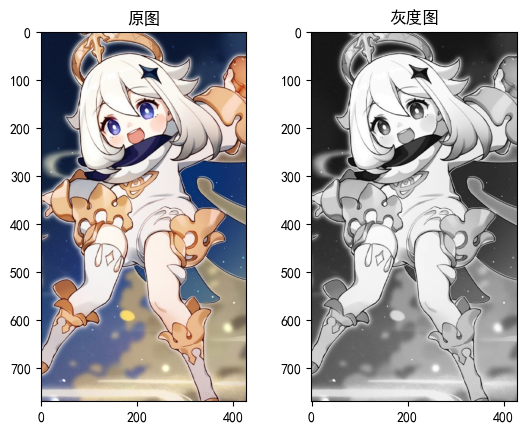

In [2]:
# 读取bgr图片
img_bgr=cv.imread("paimeng.png")
# 灰度化
img_gray=cv.cvtColor(img_bgr,cv.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.title("原图")
plt.imshow(img_bgr[:,:,::-1])
plt.subplot(1,2,2)
plt.title("灰度图")
plt.imshow(img_gray,cmap="gray")

C:\Users\Spark\AppData\Local\Temp\ipykernel_16780\752220985.py:44: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


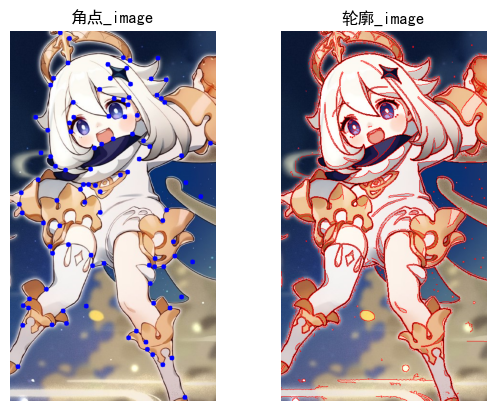

In [3]:

# 通用多级边缘检测
"""
threshold1

类型：int 或 float

说明：第一个阈值，用于边缘检测中的滞后阈值（低阈值）。低于此值的边缘会被丢弃。

threshold2

类型：int 或 float

说明：第二个阈值，用于边缘检测中的滞后阈值（高阈值）。高于此值的边缘会被保留为强边缘。

edges（可选）

类型：numpy.ndarray

说明：输出的边缘图像，与输入图像大小相同，类型为 uint8。如果未提供，函数会创建一个新的数组。

apertureSize（可选）

类型：int

说明：Sobel 算子的孔径大小，默认值为 3。可选值为 3、5 或 7。

作用：用于计算图像梯度的 Sobel 核的大小。较大的孔径可以检测到更粗的边缘。

L2gradient（可选）

类型：bool

说明：是否使用更精确的 L2 范数计算梯度。默认值为 False，表示使用 L1 范数（计算速度更快）。

如果设置为 True，则使用 L2 范数计算梯度（更精确但计算量更大）。
"""
edges=cv.Canny(img_gray,threshold1=50,threshold2=150)
# 轮廓检测
contours,_=cv.findContours(edges,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
# 绘制轮廓
contour_image = cv.drawContours(img_bgr.copy(), contours, -1, (0, 0, 255), 1)
# 角点检测
corners = cv.goodFeaturesToTrack(img_gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)

# 绘制角点
corner_image = img_bgr.copy()
for corner in corners:
    x, y = corner.ravel()
    cv.circle(corner_image, (x, y), 5, (255, 0, 0), -1)
# cv.imshow('corner_image',corner_image)
plt.subplot(1,2,1)
plt.axis('off')
plt.title('角点_image')
plt.imshow(corner_image[:,:,::-1])
plt.subplot(1,2,2)
plt.axis('off')
plt.title('轮廓_image')
plt.imshow(contour_image[:,:,::-1])


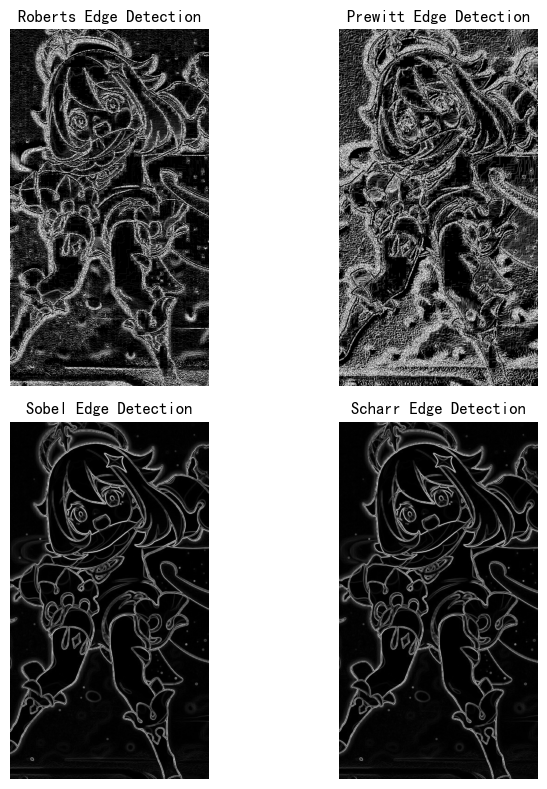

In [4]:
# 传统一阶微分边缘算子检测
cv2=cv
image=img_gray.copy()

# 1. Roberts算子
def roberts_edge_detection(image):
    """
    Roberts算子：
    - 特点：基于2x2的卷积核，计算简单，对噪声敏感。
    - 优点：计算速度快。
    - 缺点：对噪声敏感，边缘检测效果较弱。
    - 用法：通过自定义卷积核实现。
    """
    kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
    kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)
    
    roberts_x = cv2.filter2D(image, -1, kernel_x)
    roberts_y = cv2.filter2D(image, -1, kernel_y)
    
    roberts = np.sqrt(roberts_x**2 + roberts_y**2)
    return roberts

# 2. Prewitt算子
def prewitt_edge_detection(image):
    """
    Prewitt算子：
    - 特点：基于3x3的卷积核，考虑了水平和垂直方向的梯度。
    - 优点：对噪声有一定的抑制能力。
    - 缺点：边缘检测效果不如Sobel和Scharr。
    - 用法：通过自定义卷积核实现。
    """
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)
    
    prewitt_x = cv2.filter2D(image, -1, kernel_x)
    prewitt_y = cv2.filter2D(image, -1, kernel_y)
    
    prewitt = np.sqrt(prewitt_x**2 + prewitt_y**2)
    return prewitt

# 3. Sobel算子
def sobel_edge_detection(image):
    """
    Sobel算子：
    - 特点：基于3x3的卷积核，考虑了水平和垂直方向的梯度，权重分布更合理。
    - 优点：对噪声有一定的抑制能力，边缘检测效果较好。
    - 缺点：对边缘的定位精度不如Scharr。
    - 用法：OpenCV提供了cv2.Sobel()函数。
    """
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    
    sobel = np.sqrt(sobel_x**2 + sobel_y**2)
    return sobel

# 4. Scharr算子
def scharr_edge_detection(image):
    """
    Scharr算子：
    - 特点：基于3x3的卷积核，是Sobel算子的改进版本，对边缘的响应更强。
    - 优点：边缘检测精度高，对噪声有一定的抑制能力。
    - 缺点：计算量略大于Sobel。
    - 用法：OpenCV提供了cv2.Scharr()函数。
    """
    scharr_x = cv2.Scharr(image, cv2.CV_64F, 1, 0)
    scharr_y = cv2.Scharr(image, cv2.CV_64F, 0, 1)
    
    scharr = np.sqrt(scharr_x**2 + scharr_y**2)
    return scharr

# 应用各个算子
roberts = roberts_edge_detection(image)
prewitt = prewitt_edge_detection(image)
sobel = sobel_edge_detection(image)
scharr = scharr_edge_detection(image)

# 显示结果
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.imshow(roberts, cmap='gray')
plt.title('Roberts Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(prewitt, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(sobel, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(scharr, cmap='gray')
plt.title('Scharr Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

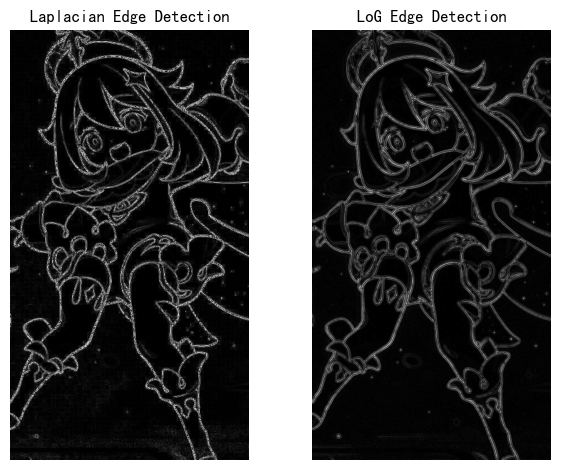

In [5]:
# 传统二阶微分边缘算子检测
image = img_gray

# Laplacian 算子
laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))  # 转换为8位无符号整数

# LoG（Laplacian of Gaussian）算子
# 步骤1：高斯平滑
image_blur = cv2.GaussianBlur(image, (5, 5), 0)
# 步骤2：Laplacian 算子
log = cv2.Laplacian(image_blur, cv2.CV_64F)
log = np.uint8(np.absolute(log))  # 转换为8位无符号整数

# 显示结果
# plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(log, cmap='gray')
plt.title('LoG Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

(-0.5, 319.5, 355.5, -0.5)

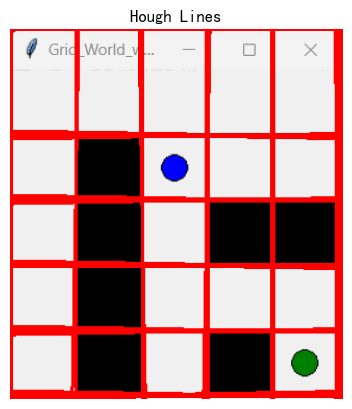

In [6]:
# 标准霍夫线变换检测直线
# 获取图像
img=cv.imread('Grid_Ball.png')
gray=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Canny边缘检测
edges = cv2.Canny(gray, 50, 150)

# 标准霍夫线变换
lines = cv2.HoughLines(
    edges,          # 二值化边缘图像
    rho=1,         # 距离分辨率（像素单位）
    theta=np.pi/180,# 角度分辨率（弧度单位）
    threshold=100   # 累加器阈值，值越大检测到的直线越少
)

# 绘制检测到的直线
if lines is not None:
    for rho, theta in lines[:,0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 2)

plt.title('Hough Lines')
plt.imshow(img[:,:,::-1])
plt.axis('off')

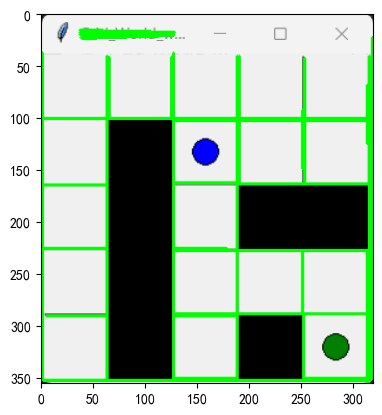

In [7]:
# 概率霍夫变换（检测线段）
# 获取图像
img=cv.imread('Grid_Ball.png')
gray=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 50, 150)

lines = cv2.HoughLinesP(
    edges,           # 输入边缘图像
    rho=1,          # 距离分辨率
    theta=np.pi/180,# 角度分辨率
    threshold=50,   # 累加器阈值
    minLineLength=50, # 线段最小长度（像素）
    maxLineGap=10    # 允许线段最大间隔（像素）
)

# 绘制线段
if lines is not None:
    for line in lines:
        x1,y1,x2,y2 = line[0]
        cv2.line(img, (x1,y1), (x2,y2), (0,255,0), 2)
plt.imshow(img[:,:,::-1])

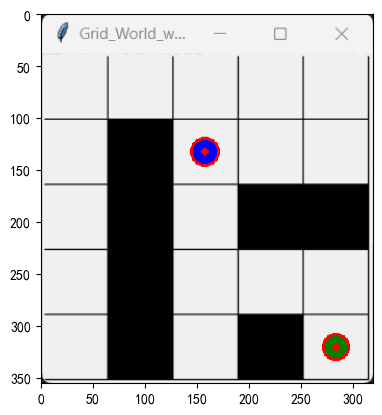

In [8]:
# 霍夫圆检测

img=cv.imread('Grid_Ball.png')
gray=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 50, 150)


circles = cv2.HoughCircles(
    gray,            # 输入灰度图像（必须单通道）
    cv2.HOUGH_GRADIENT, # 检测方法（当前唯一可用）
    dp=1.2,         # 累加器分辨率反比（1=同输入分辨率）
    minDist=50,      # 圆之间的最小中心距离
    param1=100,      # Canny边缘检测的高阈值
    param2=40,       # 累加器阈值（值越小检测圆越多）
    minRadius=5,    # 最小圆半径
    maxRadius=50    # 最大圆半径
)

# 绘制检测到的圆
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        cv2.circle(img, (i[0],i[1]), i[2], (0,0,255), 2)
        cv2.circle(img, (i[0],i[1]), 2, (0,0,255), 3)
plt.imshow(img[:,:,::-1])